In [1]:
# Generate a file dati_2.txt containing 10,000 events distributed according to a Gaussian probability distribution.
# Write a program that fits the events saved in the file dati_2.txt using the binned and unbinned maximum likelihood methods, 
# and compare the results of the two techniques.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit.cost import ExtendedBinnedNLL, UnbinnedNLL
from iminuit import Minuit
from IPython.display import display
import scipy.stats as sci

In [5]:
def model_function(x, mu, sigma):
    return sci.norm.pdf(x,mu,sigma)

def cdf_model_function(bin_edges, N, mu, sigma):
    return N*sci.norm.cdf(bin_edges,mu,sigma)

In [6]:
true_mu = 0
true_sigma = 1
N = 100000
data = np.random.normal(true_mu,true_sigma,N)

Convergenza del fit: True


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.78 (χ²/ndof = 0.7)      │              Nfcn = 45               │
│ EDM = 6.19e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │ 100.00e3  │  0.32e3   │            │            │         │         │       │
│ 1 │ mu    │  0.0019   │  0.0032   │            │            │    0    │         │       │
│ 2 │ sigma │  0.9987   │  0.0023   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         N        mu     sigma │
├───────┼───────────────────────────────┤
│     N │     1e+05 -0.011e-3    163e-6 │
│    mu │ -0.011e-3     1e-05     -0e-6 │
│ sigma │    163e-6     -0e-6  5.04e-06 │
└───────┴───────────────────────────────┘

Associated p-value:  0.9170470034545439


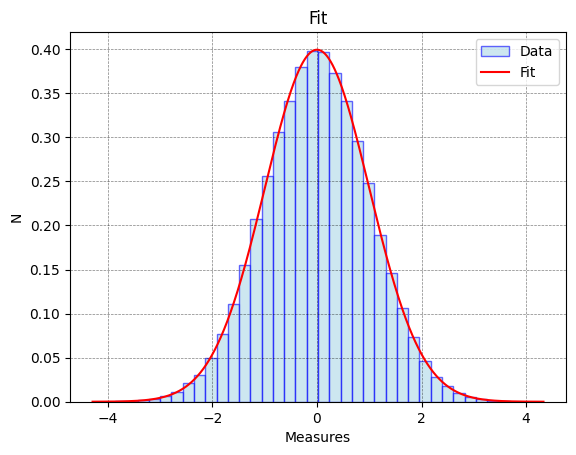

In [8]:
# BINNED FIT
bin_content, bin_edges = np.histogram(data, int(np.ceil(1+3.322*np.log(N)))) # number of event per bin
my_cost_binned_func = ExtendedBinnedNLL(bin_content, bin_edges, cdf_model_function)
my_minuit_binned = Minuit(my_cost_binned_func, N=N, mu = np.mean(data), sigma = np.std(data))
my_minuit_binned.limits["mu","sigma"]=(0,None)
my_minuit_binned.migrad()
print (f'Convergenza del fit: {my_minuit_binned.valid}')
display(my_minuit_binned)

print ('Associated p-value: ', 1. - sci.chi2.cdf (my_minuit_binned.fval, df = my_minuit_binned.ndof))

# PLOT
x_coord = np.linspace(np.min(data), np.max(data), 10000)
y_f = []
for i in range(len(x_coord)):
    y_f.append(model_function(x_coord[i], my_minuit_binned.values[1], my_minuit_binned.values[2]))

fig, ax = plt.subplots(1,1)
ax.hist(data, bins=bin_edges, color='lightblue', label='Data', edgecolor='blue', alpha=0.6, density=True)
ax.plot(x_coord, y_f, color='red', label='Fit')
ax.set_xlabel('Measures')
ax.set_ylabel('N')
ax.set_title('Fit')
ax.legend()
ax.grid(color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    
plt.show()

Convergenza del fit: True


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.835e+05                  │              Nfcn = 34               │
│ EDM = 5.24e-14 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  0.0016   │  0.0032   │            │            │    0    │         │       │
│ 1 │ sigma │  0.9984   │  0.0022   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 9.97e-06     0e-6 │
│ sigma │     0e-6 4.98e-06 │
└───────┴───────────────────┘

Associated p-value:  1.0


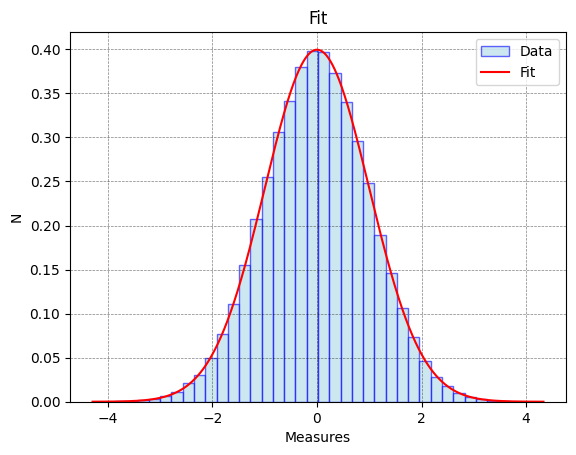

In [10]:
# UNBINNED FIT
my_cost_unbinned_func = UnbinnedNLL(data, model_function)
my_minuit_unbinned = Minuit(my_cost_unbinned_func, mu = np.mean(data), sigma = np.std(data))
my_minuit_unbinned.limits["mu","sigma"]=(0,None)
my_minuit_unbinned.migrad()
print (f'Convergenza del fit: {my_minuit_unbinned.valid}')
display(my_minuit_unbinned)

print ('Associated p-value: ', 1. - sci.chi2.cdf (my_minuit_unbinned.fval, df = my_minuit_unbinned.ndof))

# PLOT
x_coord = np.linspace(np.min(data), np.max(data), 10000)
y_f_unb = []
for i in range(len(x_coord)):
    y_f_unb.append(model_function(x_coord[i], my_minuit_unbinned.values[0], my_minuit_unbinned.values[1]))

fig, ax = plt.subplots(1,1)
ax.hist(data, bins=bin_edges, color='lightblue', label='Data', edgecolor='blue', alpha=0.6, density=True)
ax.plot(x_coord, y_f_unb, color='red', label='Fit')
ax.set_xlabel('Measures')
ax.set_ylabel('N')
ax.set_title('Fit')
ax.legend()
ax.grid(color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    
plt.show()